In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Value detect and fill these Missing Value

In [2]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Cuisine_rating.csv')
dataset.head(3)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,User ID,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,5.0,4.0,NaN,No
1,User ID,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Socially,NaN,1.0,1.0,No
2,User ID,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,5.0,5.0,5.0,Yes


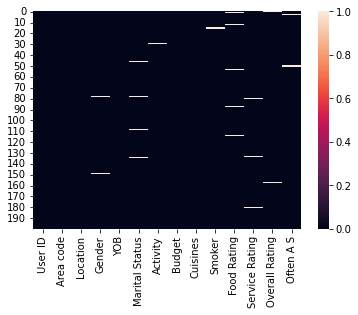

In [3]:
sns.heatmap(dataset.isnull())
plt.show()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    object 
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          198 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  196 non-null    object 
 6   Activity        199 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Smoker          199 non-null    object 
 10  Food Rating     195 non-null    float64
 11  Service Rating  197 non-null    float64
 12  Overall Rating  198 non-null    float64
 13  Often A S       198 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 22.0+ KB


In [5]:
dataset.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            2
YOB               0
Marital Status    4
Activity          1
Budget            0
Cuisines          0
Smoker            1
Food Rating       5
Service Rating    3
Overall Rating    2
Often A S         2
dtype: int64

In [6]:
# fillna for categorical
for i in dataset.select_dtypes(include='object').columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)
dataset.isnull().sum()


User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Smoker            0
Food Rating       5
Service Rating    3
Overall Rating    2
Often A S         0
dtype: int64

In [7]:
# fillna for numerical
for i in dataset.select_dtypes(include=['float64','int64']).columns:
    dataset[i].fillna(dataset[i].mean(), inplace=True)
dataset.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

# Dubicate Detect and Delete

In [8]:
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [9]:
dataset.head(3)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,User ID,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,5.000000,4.0,3.217172,No
1,User ID,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Socially,3.215385,1.0,1.000000,No
2,User ID,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,5.000000,5.0,5.000000,Yes


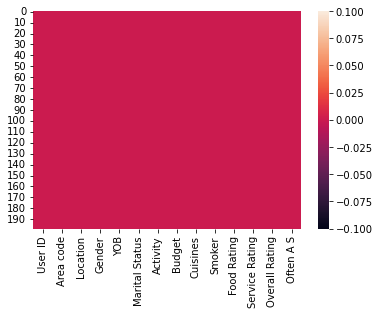

In [10]:
sns.heatmap(dataset.isnull())
plt.show()

# Outlier Detect and Remove

In [11]:
dataset.describe()

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,140.994975,1984.869347,3.814070,3.221492,5.224167,3.225801
std,26.179932,16.842497,1.059161,1.388025,22.145994,1.071198
min,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,199.000000,2009.000000,5.000000,5.000000,300.000000,5.000000


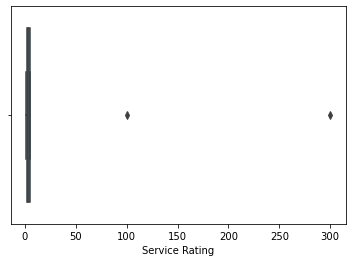

In [12]:

sns.boxplot(x='Service Rating', data=dataset)
plt.show()

In [13]:
q1 = dataset['Service Rating'].quantile(0.25)
q3 = dataset['Service Rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound, upper_bound

(-2.5, 9.5)

In [14]:
dataset = dataset[(dataset['Service Rating'] <= upper_bound)]

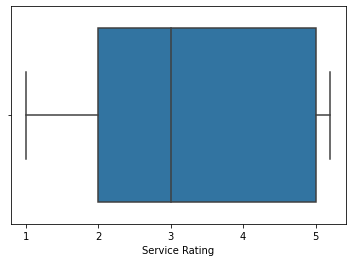

In [15]:
sns.boxplot(x='Service Rating', data=dataset)
plt.show()

In [16]:
dataset.describe()

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,140.878173,1984.746193,3.807107,3.218665,3.246747,3.220479
std,26.179821,16.883048,1.061069,1.386547,1.536239,1.067894
min,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,199.000000,2009.000000,5.000000,5.000000,5.203046,5.000000


# One-Hot Encoding

In [17]:
dataset.head(3)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,User ID,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,5.000000,4.0,3.217172,No
1,User ID,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Socially,3.215385,1.0,1.000000,No
2,User ID,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,5.000000,5.0,5.000000,Yes


In [18]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
dataset['Activity'].unique()

array(['Professional', 'Student'], dtype=object)

In [20]:
dataset['Often A S'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
encoded_features=encoder.fit_transform(dataset[['Gender','Activity','Often A S']]).toarray()
encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
print(encoded_features.columns)



Index(['Gender_Male', 'Activity_Student', 'Often A S_Yes'], dtype='object')


In [22]:
encoded_features.rename(columns={   
    'Gender_Male':'Gender',
    'Activity_Student':'Activity',
    'Often A S_Yes':'Often A S'
},inplace=True)
print(encoded_features.head())

   Gender  Activity  Often A S
0     0.0       0.0        0.0
1     0.0       1.0        0.0
2     1.0       1.0        1.0
3     0.0       0.0        0.0
4     1.0       1.0        0.0


In [23]:
# Drop only if columns exist
columns_to_drop = [col for col in ['Gender','Activity','Often A S'] if col in dataset.columns]
dataset = dataset.drop(columns=columns_to_drop, axis=1)
dataset = pd.concat([dataset, encoded_features], axis=1)
dataset.head(5)

,User ID,Area code,Location,YOB,Marital Status,Budget,Cuisines,Smoker,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S
0,User ID,153.0,"Upper East Side,NY",2006.0,Single,3.0,Japanese,Never,5.000000,4.0,3.217172,0.0,0.0,0.0
1,User ID,123.0,"St. George,NY",1991.0,Married,3.0,Indian,Socially,3.215385,1.0,1.000000,0.0,1.0,0.0
2,User ID,122.0,"Upper West Side,NY",1977.0,Single,5.0,Seafood,Often,5.000000,5.0,5.000000,1.0,1.0,1.0
3,User ID,153.0,"Upper East Side,NY",1956.0,Married,5.0,Japanese,Socially,3.000000,1.0,2.000000,0.0,0.0,0.0
4,User ID,129.0,"Central Park,NY",1997.0,Single,4.0,Filipino,Never,2.000000,4.0,3.000000,1.0,1.0,0.0


In [24]:
dataset.describe()

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,140.878173,1984.746193,3.807107,3.218665,3.246747,3.220479,0.598985,0.598985,0.126904
std,26.179821,16.883048,1.061069,1.386547,1.536239,1.067894,0.491353,0.491353,0.333713
min,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000,0.000000,0.000000,0.000000
50%,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000
75%,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.000000,0.000000
max,199.000000,2009.000000,5.000000,5.000000,5.203046,5.000000,1.000000,1.000000,1.000000


# Label Encoding

In [25]:
dataset.head(3)

,User ID,Area code,Location,YOB,Marital Status,Budget,Cuisines,Smoker,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S
0,User ID,153.0,"Upper East Side,NY",2006.0,Single,3.0,Japanese,Never,5.000000,4.0,3.217172,0.0,0.0,0.0
1,User ID,123.0,"St. George,NY",1991.0,Married,3.0,Indian,Socially,3.215385,1.0,1.000000,0.0,1.0,0.0
2,User ID,122.0,"Upper West Side,NY",1977.0,Single,5.0,Seafood,Often,5.000000,5.0,5.000000,1.0,1.0,1.0


In [26]:
dataset.isnull().sum()

User ID           2
Area code         2
Location          2
YOB               2
Marital Status    2
Budget            2
Cuisines          2
Smoker            2
Food Rating       2
Service Rating    2
Overall Rating    2
Gender            2
Activity          2
Often A S         2
dtype: int64

In [27]:
dataset['Marital Status'].unique()

array(['Single', 'Married', 'Divorced', nan], dtype=object)

In [28]:
# fillna for categorical
for i in dataset.select_dtypes(include='object').columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)
dataset.isnull().sum()

User ID           0
Area code         2
Location          0
YOB               2
Marital Status    0
Budget            2
Cuisines          0
Smoker            0
Food Rating       2
Service Rating    2
Overall Rating    2
Gender            2
Activity          2
Often A S         2
dtype: int64

In [29]:
# fillna for numerical
for i in dataset.select_dtypes(include=['float64','int64']).columns:
    dataset[i].fillna(dataset[i].mean(), inplace=True)
dataset.isnull().sum()

User ID           0
Area code         0
Location          0
YOB               0
Marital Status    0
Budget            0
Cuisines          0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Gender            0
Activity          0
Often A S         0
dtype: int64

In [30]:
dataset['Marital Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [31]:
dataset['Cuisines'].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

In [32]:

dataset['Smoker'].unique()

array(['Never', 'Socially', 'Often'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode 'Marital Status'
dataset['Marital Status_encod'] = label_encoder.fit_transform(dataset['Marital Status'])
dataset['Cuisines_encod'] = label_encoder.fit_transform(dataset['Cuisines'])
dataset['Smoker_encod'] = label_encoder.fit_transform(dataset['Smoker'])
dataset.head()

,User ID,Area code,Location,YOB,Marital Status,Budget,Cuisines,Smoker,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S,Marital Status_encod,Cuisines_encod,Smoker_encod
0,User ID,153.0,"Upper East Side,NY",2006.0,Single,3.0,Japanese,Never,5.000000,4.0,3.217172,0.0,0.0,0.0,2,5,0
1,User ID,123.0,"St. George,NY",1991.0,Married,3.0,Indian,Socially,3.215385,1.0,1.000000,0.0,1.0,0.0,1,3,2
2,User ID,122.0,"Upper West Side,NY",1977.0,Single,5.0,Seafood,Often,5.000000,5.0,5.000000,1.0,1.0,1.0,2,6,1
3,User ID,153.0,"Upper East Side,NY",1956.0,Married,5.0,Japanese,Socially,3.000000,1.0,2.000000,0.0,0.0,0.0,1,5,2
4,User ID,129.0,"Central Park,NY",1997.0,Single,4.0,Filipino,Never,2.000000,4.0,3.000000,1.0,1.0,0.0,2,1,0


In [34]:
dataset = dataset.drop(columns=['Marital Status', 'Cuisines', 'Smoker'], axis=1)
dataset.head(3)

,User ID,Area code,Location,YOB,Budget,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S,Marital Status_encod,Cuisines_encod,Smoker_encod
0,User ID,153.0,"Upper East Side,NY",2006.0,3.0,5.000000,4.0,3.217172,0.0,0.0,0.0,2,5,0
1,User ID,123.0,"St. George,NY",1991.0,3.0,3.215385,1.0,1.000000,0.0,1.0,0.0,1,3,2
2,User ID,122.0,"Upper West Side,NY",1977.0,5.0,5.000000,5.0,5.000000,1.0,1.0,1.0,2,6,1


# Feature engineering

In [35]:

dataset.head(3)

,User ID,Area code,Location,YOB,Budget,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S,Marital Status_encod,Cuisines_encod,Smoker_encod
0,User ID,153.0,"Upper East Side,NY",2006.0,3.0,5.000000,4.0,3.217172,0.0,0.0,0.0,2,5,0
1,User ID,123.0,"St. George,NY",1991.0,3.0,3.215385,1.0,1.000000,0.0,1.0,0.0,1,3,2
2,User ID,122.0,"Upper West Side,NY",1977.0,5.0,5.000000,5.0,5.000000,1.0,1.0,1.0,2,6,1


In [36]:
dataset.drop(columns=['User ID'],inplace=True)
dataset.drop(columns=['Location'],inplace=True)
dataset.head(2)

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S,Marital Status_encod,Cuisines_encod,Smoker_encod
0,153.0,2006.0,3.0,5.000000,4.0,3.217172,0.0,0.0,0.0,2,5,0
1,123.0,1991.0,3.0,3.215385,1.0,1.000000,0.0,1.0,0.0,1,3,2


In [37]:
x = dataset.drop('Service Rating', axis=1)
y = dataset['Service Rating']

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
sfs = SequentialFeatureSelector(lr, 
                                 k_features='best', 
                                 forward=True,  
                                 scoring='r2',
                                 cv=5,
                                 )

sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 11),
                          scoring='r2')

In [39]:
sfs.feature_names

['Area code',
 'YOB',
 'Budget',
 'Food Rating',
 'Overall Rating',
 'Gender',
 'Activity',
 'Often A S',
 'Marital Status_encod',
 'Cuisines_encod',
 'Smoker_encod']

In [40]:
sfs.k_feature_names_

('Area code',
 'Budget',
 'Food Rating',
 'Overall Rating',
 'Marital Status_encod',
 'Smoker_encod')

In [41]:
sfs.k_score_

0.949806009744823

# Train Test Split

In [42]:
dataset.head(3)

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S,Marital Status_encod,Cuisines_encod,Smoker_encod
0,153.0,2006.0,3.0,5.000000,4.0,3.217172,0.0,0.0,0.0,2,5,0
1,123.0,1991.0,3.0,3.215385,1.0,1.000000,0.0,1.0,0.0,1,3,2
2,122.0,1977.0,5.0,5.000000,5.0,5.000000,1.0,1.0,1.0,2,6,1


In [43]:
# input features and output feature
input_data = dataset.iloc[:, :-1]  # all rows, all columns except the last one
output_data = dataset["Service Rating"]  # all rows, only the last column

In [44]:
dataset.shape

(199, 12)

In [45]:
# Train and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((159, 11), (40, 11), (159,), (40,))

# Function Transformation

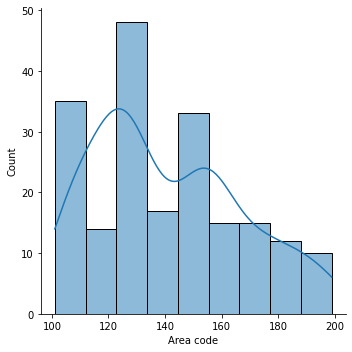

In [47]:
sns.displot(x='Area code', data=dataset, kde=True)
plt.show()

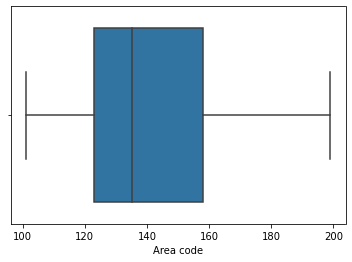

In [48]:
sns.boxplot(x='Area code', data=dataset)
plt.show()

In [49]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(np.log1p, validate=True)
dataset['Area code_tf']=ft.fit_transform(dataset[['Area code']])
dataset.head(3)

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Gender,Activity,Often A S,Marital Status_encod,Cuisines_encod,Smoker_encod,Area code_tf
0,153.0,2006.0,3.0,5.000000,4.0,3.217172,0.0,0.0,0.0,2,5,0,5.036953
1,123.0,1991.0,3.0,3.215385,1.0,1.000000,0.0,1.0,0.0,1,3,2,4.820282
2,122.0,1977.0,5.0,5.000000,5.0,5.000000,1.0,1.0,1.0,2,6,1,4.812184


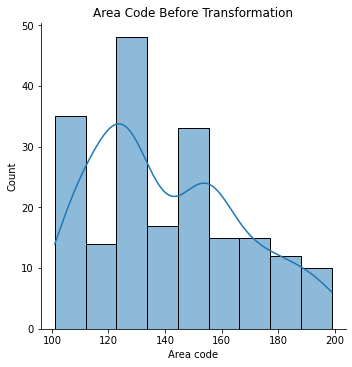

<function matplotlib.pyplot.show(close=None, block=None)>

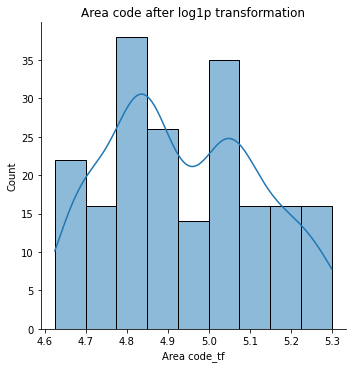

In [55]:

sns.displot(x='Area code', data=dataset, kde=True)
plt.title('Area Code Before Transformation')
plt.show()

sns.displot(x='Area code_tf', data=dataset, kde=True)
plt.title('Area code after log1p transformation')
plt.show

